# Trying to plot spatial maps of other years of snowfall
Created Eric S. Martinez  
July 13, 2021

### Loading libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Importing data

In [3]:
path_name = '/Users/atoc_reu_student/Downloads/ERA5/Data/Monthly/'
file_name = 'era5_sl_mon_global_snowfall_1979_2020.nc'
full_dataset = xr.open_mfdataset(path_name+file_name)
sf = full_dataset.sf
sf_2000 = sf.sel(time = slice('2000-01-01', '2001-01-01'), latitude=slice(-60, -90), longitude=slice(239.5,269.5))
sf_1999 = sf.sel(time = slice('1999-01-01', '1999-12-01'), latitude=slice(-60, -90), longitude=slice(239.5,269.5))

In [4]:
sf

<xarray.DataArray 'sf' (time: 504, latitude: 721, longitude: 1440)>
dask.array<open_dataset-7be12f1e1588260774dab1d336f928b7sf, shape=(504, 721, 1440), dtype=float32, chunksize=(504, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Attributes:
    units:          m of water equivalent
    long_name:      Snowfall
    standard_name:  lwe_thickness_of_snowfall_amount

In [5]:
total_sf_2000 = sum(sf_2000)
total_sf_2000 = total_sf_2000*(10**3)
total_sf_1999 = sum(sf_1999)
total_sf_1999 = total_sf_1999*(10**3)
mean_sf_1999 = sf_1999.mean(dim='time')
mean_sf_1999 = mean_sf_1999*(10**3)

In [6]:
mean_sf_1999

<xarray.DataArray 'sf' (latitude: 121, longitude: 121)>
dask.array<mul, shape=(121, 121), dtype=float32, chunksize=(121, 121), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 239.5 239.8 240.0 240.2 ... 269.0 269.2 269.5
  * latitude   (latitude) float32 -60.0 -60.25 -60.5 ... -89.5 -89.75 -90.0

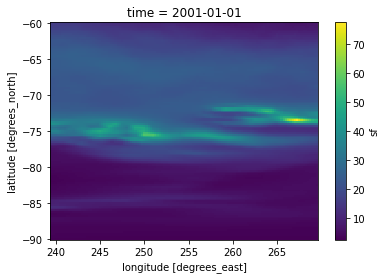

In [7]:
total_sf_2000.plot()

/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


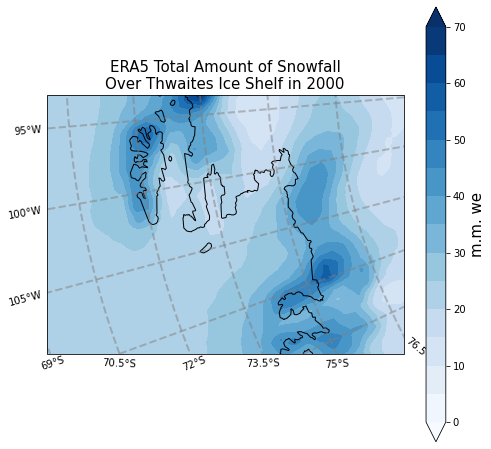

In [8]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(total_sf_2000.longitude, total_sf_2000.latitude, total_sf_2000, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
                 levels = np.arange(0,75,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Total Amount of Snowfall\n' + 'Over Thwaites Ice Shelf in 2000', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_total_snowfall_2000.jpg", dpi = 100)


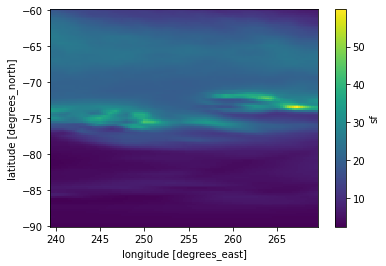

In [11]:
total_sf_1999.plot()

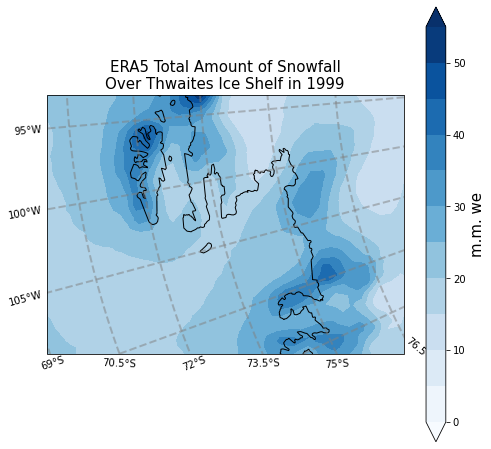

In [9]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(total_sf_1999.longitude, total_sf_1999.latitude, total_sf_1999, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
                 levels = np.arange(0,60,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Total Amount of Snowfall\n' + 'Over Thwaites Ice Shelf in 1999', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_total_snowfall_1999.jpg", dpi = 100)


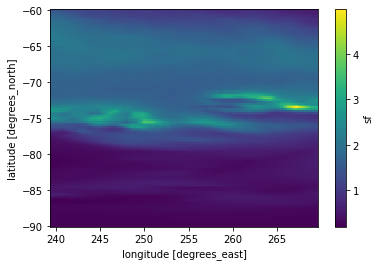

In [24]:
mean_sf_1999.plot()